<a href="https://colab.research.google.com/github/Hernan021076/Objetc-Detection---Python-YOLOv8/blob/main/Trabajo%20para%20la%20Diplomatura%20en%20Ciencia%20de%20Datos%20-%20CNN%20y%20segmentaci%C3%B3n%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalación de TensorFLow, Matplot y Scikit-learn
!pip install tensorflow matplotlib scikit-learn


# 1. Cargado de librerías

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
import zipfile
zip_path = "/content/dataset/archive.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

data_dir = "/content/intel_data/seg_train/seg_train"
val_dir = "/content/intel_data/seg_test/seg_test"

In [18]:
# 3. Generadores de imágenes

train_dir = "/content/dataset/seg_train/seg_train"
val_dir   = "/content/dataset/seg_test/seg_test"
test_dir  = "/content/dataset/seg_pred" # Corrected test directory path

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255) # Uncommented

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

test_gen = test_datagen.flow_from_directory( # Uncommented
    test_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical", shuffle=False
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [19]:
import os

# List the contents of the extracted directory to understand the structure
print(os.listdir('/content/dataset'))

['archive.zip', 'seg_test', 'seg_train', 'seg_pred']


In [20]:
# 4. Definir modelo con ResNet50

base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # congelamos las capas convolucionales

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
preds = Dense(train_gen.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
# 5. Entrenar

epochs = 40  # acordarme de ajustar aca la cantidad de epocas (ojo sobreajuste: revisar Accuaracy, loss, Val_loss)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

Epoch 1/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.4758 - loss: 1.3308 - val_accuracy: 0.5333 - val_loss: 1.2866
Epoch 2/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4880 - loss: 1.3248 - val_accuracy: 0.5467 - val_loss: 1.2793
Epoch 3/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 103ms/step - accuracy: 0.4904 - loss: 1.3208 - val_accuracy: 0.5443 - val_loss: 1.2723
Epoch 4/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.4839 - loss: 1.3119 - val_accuracy: 0.5527 - val_loss: 1.2665
Epoch 5/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4890 - loss: 1.3132 - val_accuracy: 0.5553 - val_loss: 1.2603
Epoch 6/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4934 - loss: 1.3025 - val_accuracy: 0.5353 - val_loss: 1.2561
Epoch 7/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4943 - loss: 1.2937 - val_accuracy: 0.5480 - val_loss: 1.2499
Epoch 8/40
439/439 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.4953 - loss: 1

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 106s 192ms/step - accuracy: 0.9068 - loss: 0.2517 - val_accuracy: 0.7403 - val_loss: 0.9572
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 72s 163ms/step - accuracy: 0.9091 - loss: 0.2357 - val_accuracy: 0.7613 - val_loss: 0.8156
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 157ms/step - accuracy: 0.9213 - loss: 0.2147 - val_accuracy: 0.7780 - val_loss: 0.8791
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.9187 - loss: 0.2247 - val_accuracy: 0.7753 - val_loss: 0.8093
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 157ms/step - accuracy: 0.9307 - loss: 0.1856 - val_accuracy: 0.7517 - val_loss: 0.9170
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.9276 - loss: 0.1976 - val_accuracy: 0.7503 - val_loss: 1.0118
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.9325 - loss: 0.1875 - val_accuracy: 0.7103 - val_loss: 1.2364
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - accuracy: 0.9324 - loss: 

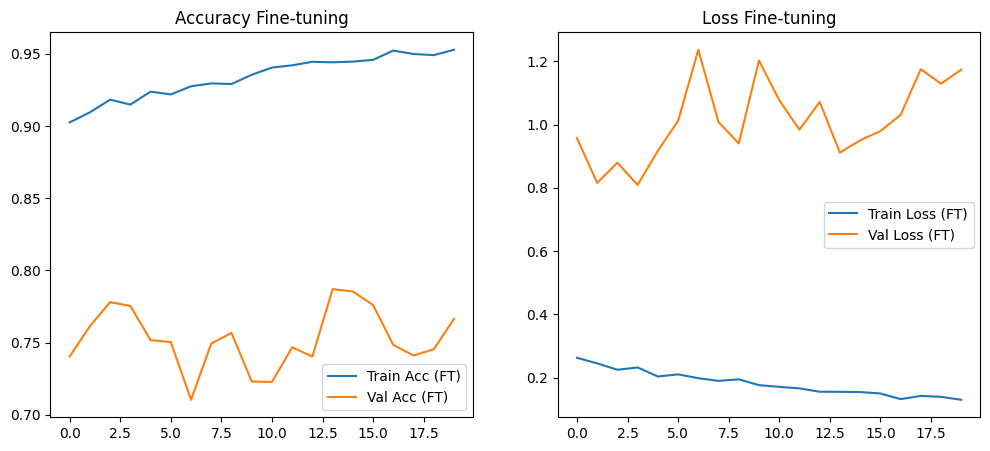

In [34]:
# -------------------------------
# Fine-tuning del modelo
# -------------------------------

# Descongelamos las últimas capas convolucionales
for layer in base_model.layers[-50:]:  # probá con -30, -50, etc.
    layer.trainable = True

# Recompilamos con un learning rate más bajo
model.compile(optimizer=Adam(learning_rate=1e-5),  # muy bajo
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Entrenamos de nuevo
fine_tune_epochs = 20  # vamos a probar con 10 o 20 y ver que sucede
history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=fine_tune_epochs
)

# -------------------------------
# Curvas de entrenamiento (Fine-tuning)
# -------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_ft.history['accuracy'], label='Train Acc (FT)')
plt.plot(history_ft.history['val_accuracy'], label='Val Acc (FT)')
plt.legend(); plt.title("Accuracy Fine-tuning")

plt.subplot(1,2,2)
plt.plot(history_ft.history['loss'], label='Train Loss (FT)')
plt.plot(history_ft.history['val_loss'], label='Val Loss (FT)')
plt.legend(); plt.title("Loss Fine-tuning")

plt.show()

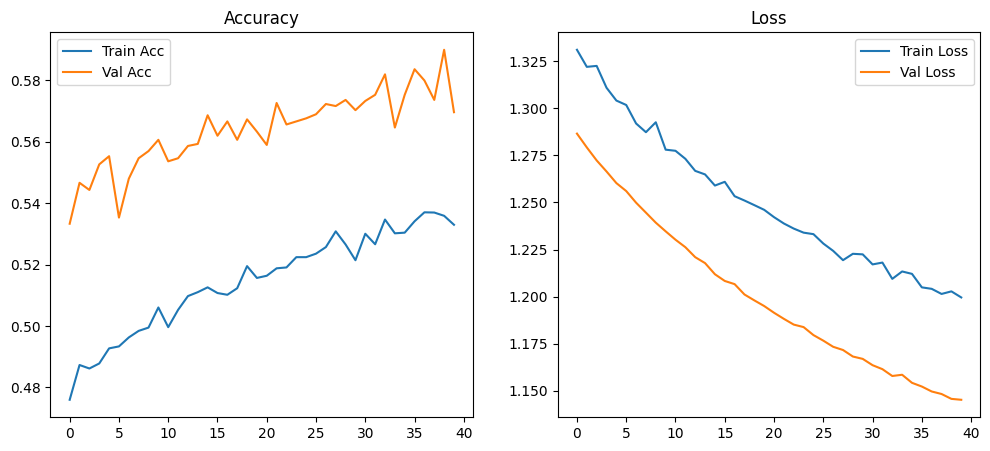

In [35]:

# 6. Curvas de entrenamiento - Analisis del entrenamiento

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")

plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step


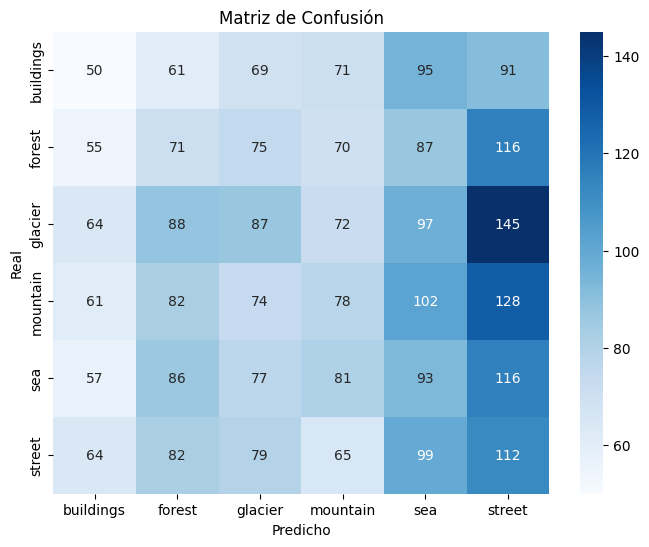

              precision    recall  f1-score   support

   buildings       0.14      0.11      0.13       437
      forest       0.15      0.15      0.15       474
     glacier       0.19      0.16      0.17       553
    mountain       0.18      0.15      0.16       525
         sea       0.16      0.18      0.17       510
      street       0.16      0.22      0.19       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



In [36]:
# 7. Evaluación en Test

# Use the validation generator for evaluation as it contains all classes with known labels
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes # Get true labels from the validation generator

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(train_gen.class_indices.keys()),
            yticklabels=list(train_gen.class_indices.keys()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(train_gen.class_indices.keys())))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


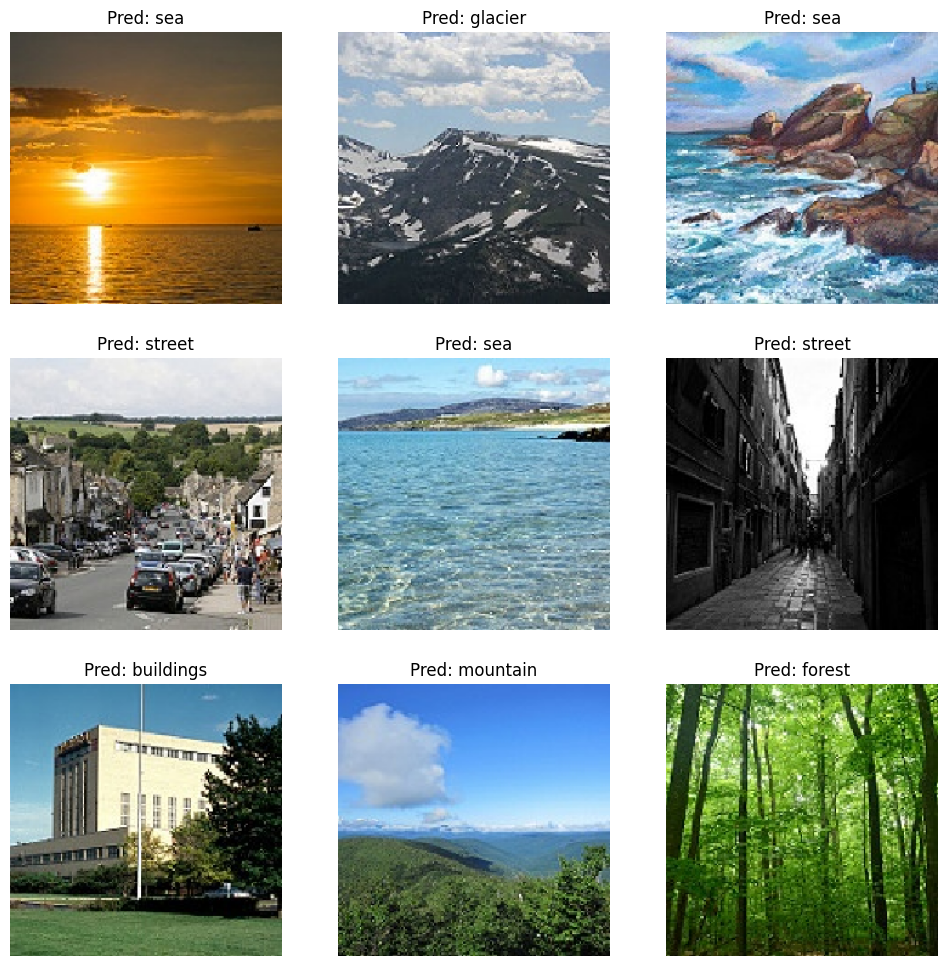

In [37]:
# 8. Mostrar ejemplos de predicciones

class_names = list(train_gen.class_indices.keys()) # Use train_gen for class names

x_batch, y_batch = next(test_gen)

plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = x_batch[i]
    # Removed true_label as test_gen only has one class
    pred_label = class_names[np.argmax(model.predict(img[np.newaxis,...]))]
    plt.imshow(img)
    plt.title(f"Pred: {pred_label}") # Only display predicted label
    plt.axis("off")
plt.show()